# Implementación del algoritmo KNN 

In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV


import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('data_final.txt', sep='\t')
df.head()

,name,spect_b,0.45,0.452002002002002,0.45400400400400404,0.456006006006006,0.458008008008008,0.46001001001001,0.46201201201201203,0.46401401401401404,...,2.431981981981982,2.433983983983984,2.4359859859859863,2.437987987987988,2.43998998998999,2.441991991991992,2.443993993993994,2.4459959959959963,2.447997997997998,2.45
0,Abehiroshi,V,0.9765,0.873727,0.802019,0.908693,0.992507,0.892887,0.806158,0.822114,...,1.453882,1.428696,1.286868,1.095002,0.999979,1.100082,1.281601,1.382604,1.370983,1.3453
1,Senrikyu,B,1.1423,1.104633,1.062175,0.996224,0.949799,1.010879,1.060699,1.024171,...,0.991043,0.997508,1.001280,1.001278,1.000005,0.999570,0.999831,1.000092,1.000091,1.0000
2,Robinson,Sr,0.8445,0.770504,0.786651,0.801385,0.780085,0.812111,0.815159,0.828218,...,1.696828,1.687543,1.699685,1.727674,1.741618,1.724284,1.714307,1.760465,1.817740,1.7467
3,Paris,T,0.9238,0.935045,0.928104,0.933731,0.943692,0.937315,0.953128,0.967190,...,2.056997,1.990262,1.979909,2.040457,1.958246,1.594457,1.155880,0.926450,0.944271,1.0000
4,Farinella,D,0.8795,0.953828,0.956625,0.849646,0.784283,0.867913,0.938608,0.909334,...,1.482280,1.065135,1.077220,1.503595,1.945946,2.089067,2.025298,1.945494,1.926199,1.9289


In [3]:
# Mezclar el dtaset de forma aleatoria
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,name,spect_b,0.45,0.452002002002002,0.45400400400400404,0.456006006006006,0.458008008008008,0.46001001001001,0.46201201201201203,0.46401401401401404,...,2.431981981981982,2.433983983983984,2.4359859859859863,2.437987987987988,2.43998998998999,2.441991991991992,2.443993993993994,2.4459959959959963,2.447997997997998,2.45
0,Hirundo,Cgh,0.8977,0.891113,0.893696,0.896894,0.898745,0.907548,0.916655,0.926632,...,1.227603,1.232022,1.233962,1.233960,1.232906,1.231569,1.230139,1.228630,1.226311,1.2217
1,Europa,C,0.9147,0.923830,0.923655,0.927794,0.937310,0.938574,0.930813,0.933986,...,1.304552,1.303959,1.303771,1.304766,1.306391,1.307985,1.308680,1.307761,1.309303,1.3222
2,Psyche,X,0.9084,0.924730,0.930489,0.925401,0.908388,0.894143,0.921720,0.932843,...,1.483241,1.484491,1.474793,1.464199,1.483277,1.539929,1.546255,1.396832,1.144221,1.0000
3,Hebe,S,0.8858,0.905882,0.861419,0.850516,0.886861,0.880098,0.863066,0.879971,...,1.210015,1.065867,0.958425,0.941561,0.999554,1.108919,1.227369,1.308741,1.327765,1.2802
4,Wood,S,0.8547,0.852304,0.850983,0.857229,0.858517,0.859017,0.865424,0.871978,...,1.361696,1.359801,1.347493,1.334237,1.344745,1.385816,1.388723,1.271191,1.081631,1.0000


Se observa que el dataset está muy desbalanceado:

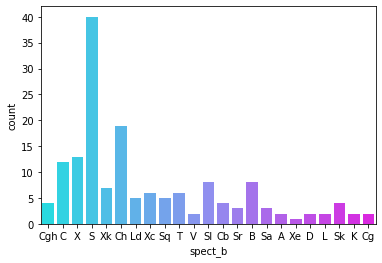

In [4]:
sns.countplot(x='spect_b', data=df, palette='cool')

Se eligen las 4 clases principales: **S,  h,  X,  C**  y quedan 100 asteroides:

In [5]:
df = df[(df.spect_b == 'S') | (df.spect_b == 'Ch') | (df.spect_b == 'X') | (df.spect_b == 'C') | (df.spect_b == 'Sl') | (df.spect_b == 'B') ]
df.shape

(100, 1002)

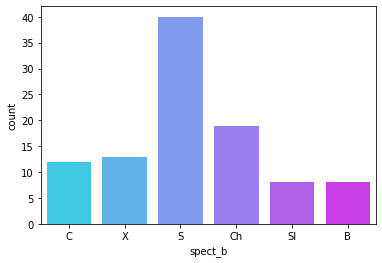

In [6]:
sns.countplot(x='spect_b', data=df, palette='cool')

Se divide en características (intensidad en cada longitud de onda) y labels (tipo espectral): 

In [7]:
X_data = df[df.columns[2:]]
y_data = df.spect_b # label
y_data_code = y_data.astype("category").cat.codes # label numérica

X_data.head()

,0.45,0.452002002002002,0.45400400400400404,0.456006006006006,0.458008008008008,0.46001001001001,0.46201201201201203,0.46401401401401404,0.46601601601601605,0.468018018018018,...,2.431981981981982,2.433983983983984,2.4359859859859863,2.437987987987988,2.43998998998999,2.441991991991992,2.443993993993994,2.4459959959959963,2.447997997997998,2.45
1,0.9147,0.923830,0.923655,0.927794,0.937310,0.938574,0.930813,0.933986,0.936350,0.927616,...,1.304552,1.303959,1.303771,1.304766,1.306391,1.307985,1.308680,1.307761,1.309303,1.3222
2,0.9084,0.924730,0.930489,0.925401,0.908388,0.894143,0.921720,0.932843,0.926268,0.923234,...,1.483241,1.484491,1.474793,1.464199,1.483277,1.539929,1.546255,1.396832,1.144221,1.0000
3,0.8858,0.905882,0.861419,0.850516,0.886861,0.880098,0.863066,0.879971,0.890077,0.882779,...,1.210015,1.065867,0.958425,0.941561,0.999554,1.108919,1.227369,1.308741,1.327765,1.2802
4,0.8547,0.852304,0.850983,0.857229,0.858517,0.859017,0.865424,0.871978,0.881150,0.889311,...,1.361696,1.359801,1.347493,1.334237,1.344745,1.385816,1.388723,1.271191,1.081631,1.0000
5,0.8616,0.841106,0.820034,0.821962,0.841713,0.860522,0.852965,0.856377,0.872028,0.878499,...,1.145478,1.414929,1.581885,1.582837,1.520387,1.485876,1.494581,1.540749,1.578547,1.5218


La longitud de onda máxima a la cual se considera rango visible es a los $0.730 \mu m$.

In [8]:
print(X_data.columns[142])
X_visible = X_data[X_data.columns[:142]]
print('Shape dataframe espectro visible',X_visible.shape)

0.7342842842842843
Shape dataframe espectro visible (100, 142)


In [9]:
X_nir = X_data[X_data.columns[142:]]
print('Shape dataframe espectro infrarrojo cercano',X_nir.shape)

Shape dataframe espectro infrarrojo cercano (100, 858)


## Resultados con el dataframe del espectro **Visible**

In [10]:
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_visible, y_data_code, test_size=0.3, random_state=1)
X_train_vis.shape, X_test_vis.shape, y_train_vis.shape, y_test_vis.shape

((70, 142), (30, 142), (70,), (30,))

#### Entrenamiento y GridSearch: Búsqueda de mejores hiperparámetros

In [11]:
def graph_neighbors(X_train, y_train, X_test, y_test):
    
    training_accuracy = []
    test_accuracy = []

    # try n_neighbors from 1 to 10
    neighbors_settings = range(1, 20)

    for n_neighbors in neighbors_settings:
        clf = KNeighborsClassifier(n_neighbors=n_neighbors)
        clf.fit(X_train, y_train)
        # record training set accuracy
        training_accuracy.append(clf.score(X_train, y_train))
        # record generalization accuracy
        test_accuracy.append(clf.score(X_test, y_test))


    plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
    plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
    plt.ylabel("Accuracy")
    plt.xlabel("n_neighbors")
    plt.legend()

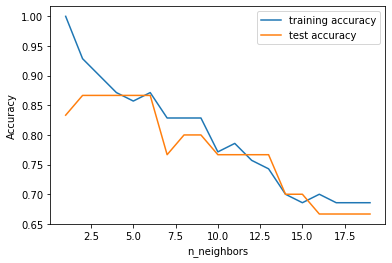

In [12]:
graph_neighbors(X_train_vis, y_train_vis, X_test_vis, y_test_vis)

In [13]:
def model(X_train, y_train):
    
    knn = KNeighborsClassifier()  
    
    param_grid = dict(n_neighbors=list(range(1, 20)), 
                      weights=['uniform', 'distance'],
                      algorithm=['auto', 'ball_tree', 'kd_tree', 'brute'])

    grid = GridSearchCV(knn, param_grid, cv=5)
    grid.fit(X_train, y_train)
    
    best_param = grid.best_params_
    
    print('Mejores hiperparámetros',grid.best_params_)
    print('Mejor score',grid.best_score_)
    
    return best_param

In [14]:
best_param_vis = model(X_train_vis, y_train_vis)

Mejores hiperparámetros {'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'distance'}
Mejor score 0.8714285714285716


### Modelo final con espectro visible

In [15]:
def train_test_model(X_train, y_train, X_test, y_test, y_data, best_param):
    
    clf = KNeighborsClassifier(**best_param)
    clf.fit(X_train, y_train)

    p = clf.predict(X_test)
    
    #Importe el módulo de métricas de sklearn para medir el desempeño (accuracy_score) de su modelo.
    print("Train set Accuracy: ", metrics.accuracy_score(y_train, clf.predict(X_train)))
    print("Test set Accuracy: ", metrics.accuracy_score(y_test, p))
    
    # Matrix de confusión
    mat = confusion_matrix(y_test, p)
    sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap="Blues")
    plt.title('Matriz de confusión')
    plt.xlabel('true label')
    plt.ylabel('predicted label')
    print(classification_report(y_test, p))
    
    
    #train model with cv of 5 
    cv_scores = cross_val_score(clf, X_test , y_test, cv=5)
    #print each cv score (accuracy) and average them
    print(cv_scores)
    print('cv_scores mean:{}'.format(np.mean(cv_scores)))
    
    # Show first two principal components without scaler
    pca = PCA()
    plt.figure(figsize=(8,6))
    Xt = pca.fit_transform(X_test)
    plot = plt.scatter(Xt[:,0], Xt[:,1], c=y_test)
    plt.legend(handles=plot.legend_elements()[0], labels=list(y_data))
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title("First two principal components")
    plt.show()
    
    return p

Train set Accuracy:  1.0
Test set Accuracy:  0.8666666666666667


/Users/daniandreacosmo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/daniandreacosmo/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.00      0.00      0.00         0
           2       1.00      1.00      1.00         5
           3       0.88      0.93      0.90        15
           4       0.50      0.33      0.40         3
           5       1.00      0.75      0.86         4

    accuracy                           0.87        30
   macro avg       0.73      0.67      0.69        30
weighted avg       0.89      0.87      0.87        30

[1.         1.         0.83333333 0.66666667 0.83333333]
cv_scores mean:0.8666666666666666


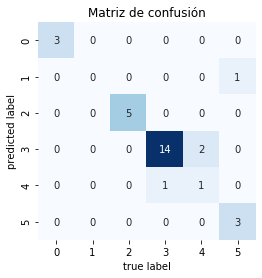

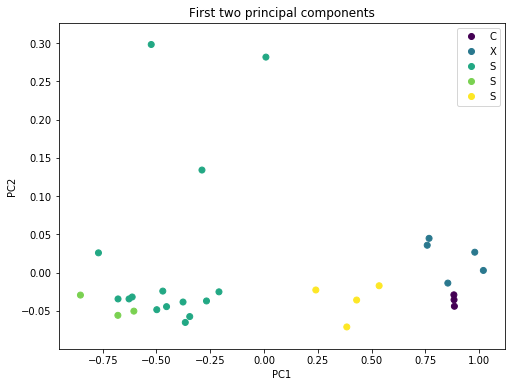

In [16]:
pred_vis = train_test_model(X_train_vis, 
                            y_train_vis, 
                            X_test_vis, 
                            y_test_vis, 
                            y_data, 
                            best_param_vis)

In [17]:
compa = pd.DataFrame({'y_test': y_test_vis.values, 'p': pred_vis})
compa

,y_test,p
0,3,3
1,3,3
2,3,3
3,0,0
4,3,3
5,3,3
6,3,3
7,3,3
8,3,3
9,2,2


## Resultados con el dataframe del espectro **Infrarrojo Cercano**

In [18]:
X_train_nir, X_test_nir, y_train_nir, y_test_nir = train_test_split(X_nir, y_data_code, test_size=0.3, random_state=1)
X_train_nir.shape, X_test_nir.shape, y_train_nir.shape, y_test_nir.shape

((70, 858), (30, 858), (70,), (30,))

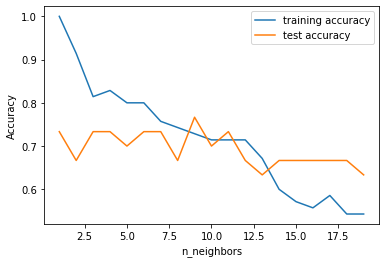

In [19]:
graph_neighbors(X_train_nir, y_train_nir, X_test_nir, y_test_nir)

In [20]:
best_param_nir = model(X_train_nir, y_train_nir)

Mejores hiperparámetros {'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'distance'}
Mejor score 0.7714285714285715


Train set Accuracy:  1.0
Test set Accuracy:  0.7333333333333333
              precision    recall  f1-score   support

           0       0.50      0.33      0.40         3
           1       0.00      0.00      0.00         0
           2       0.57      0.80      0.67         5
           3       0.87      0.87      0.87        15
           4       0.50      0.33      0.40         3
           5       1.00      0.75      0.86         4

    accuracy                           0.73        30
   macro avg       0.57      0.51      0.53        30
weighted avg       0.76      0.73      0.74        30

[0.83333333 0.5        0.66666667 0.66666667 0.83333333]
cv_scores mean:0.7


/Users/daniandreacosmo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/daniandreacosmo/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


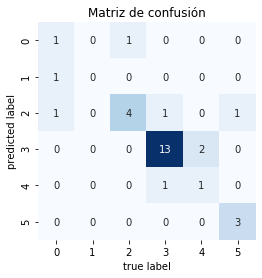

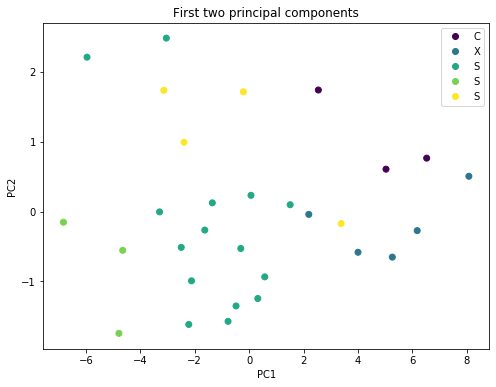

In [21]:
pred_nir = train_test_model(X_train_nir, 
                            y_train_nir, 
                            X_test_nir, 
                            y_test_nir, 
                            y_data, 
                            best_param_nir)